In [1]:
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

In [3]:
path = os.path.join("Resources", "online_shoppers_intention.csv")

In [4]:
OSHIdf = pd.read_csv(path)

In [5]:
OSHIdf.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [6]:
#list of attributes 
OSHIdf.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [7]:
#Dimesions of the Data frame
OSHIdf.shape

(12330, 18)

In [8]:
OSHIdf.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [9]:
#Attributes data type
OSHIdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

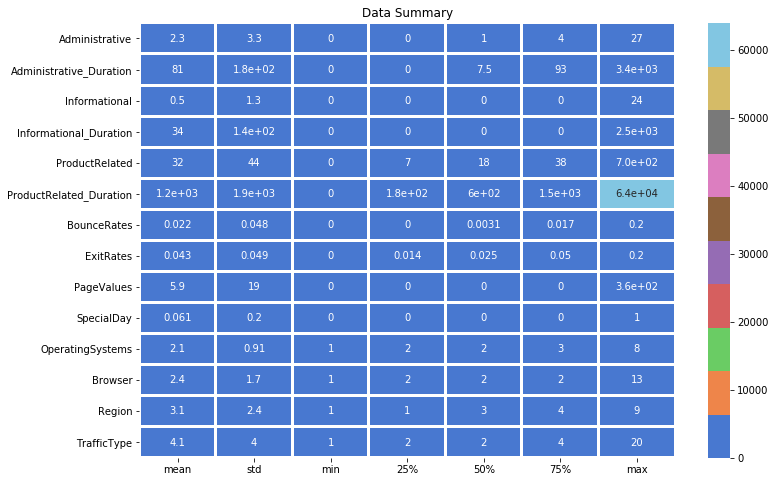

In [10]:
#Checking the summary of numeric attributes 
plt.figure(figsize = (12,8))
sns.heatmap(OSHIdf.describe()[1:].transpose(),
            annot=True,linecolor = "w",
            linewidth=2, cmap=sns.color_palette("muted"))
plt.title("Data Summary")
plt.show()

In [11]:
#Detecting missing Values 
OSHIdf.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [12]:
#Detecting missing Values 
OSHIdf.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [13]:
 cleanOSHIdf = OSHIdf

In [14]:
#Finding number of cases which clicked on Adminstative pages but their corresponding Adminstative_duration is 0, 
#Meaning Administative_duration is missing from that row missing_Administartive_duration = OSHIdf[(OSHIdf["Administrative"] >= 1) & (OSHIdf["Administrative_Duration"] == 0)]
missing_Administartive_duration = OSHIdf[(OSHIdf["Administrative"] >= 1) & (OSHIdf["Administrative_Duration"] == 0)]
missing_Administartive_duration.shape[0]

135

In [15]:
#Now we are detecting which values of adminstrative has one or more than one but show 0 as value in in their corresponding Adminstattive_duration
#We are doing these to avoid kind a replacement which will end up to reduction in variance and might effect corrolation as well 
#To avoid this we replace 0 values on the Administartive_duration columns with the median of duration on that specific group and not the median of duration for the whole column of duration
OSHIdf["Administrative"]. value_counts()
OSHIdf[(OSHIdf["Administrative"] == 1) & (OSHIdf["Administrative_Duration"] == 0)].shape[0]
OSHIdf[(OSHIdf["Administrative"] == 2) & (OSHIdf["Administrative_Duration"] == 0)].shape[0]
# so Administrative duration has 135 missing values, 131 of them has been clicked on 1 Aministarative page and 4 of them has been clicked on 2 Administrative pages, 
#we will replace 134 of zero values with mean of duration for rows with 1 as Administrative value and the rest (4 zero values) with mean of adminstrative rows with 2 as value 

4

In [16]:
#We want to get the mean of adminstrative_Duration when Adminstrative is 1 
OSHIdf.loc[(OSHIdf["Administrative"] == 1) & (OSHIdf["Administrative_Duration"] != 0),"Administrative_Duration"].mean()

47.050223958417824

In [17]:
#we will replace all the 0 values on adminstrative_Duration with correspond adminstrative as 1 with the mean of adminstrative_Duration when Adminstrative is 1 
cleanOSHIdf[(cleanOSHIdf["Administrative"] == 1) & (cleanOSHIdf["Administrative_Duration"] == 0)].replace({0 : 47.050223958417824})['Administrative_Duration']

7        47.050224
170      47.050224
177      47.050224
242      47.050224
480      47.050224
           ...    
12000    47.050224
12097    47.050224
12216    47.050224
12238    47.050224
12311    47.050224
Name: Administrative_Duration, Length: 131, dtype: float64

In [18]:
OSHIdf.loc[(OSHIdf["Administrative"] == 2) & (OSHIdf["Administrative_Duration"] != 0),"Administrative_Duration"].mean()

86.5326272501054

In [19]:
cleanOSHIdf[(cleanOSHIdf["Administrative"] == 2) & (cleanOSHIdf["Administrative_Duration"] == 0)].replace({0 : 86.5326272501054})['Administrative_Duration']

1138    86.532627
3925    86.532627
4461    86.532627
4970    86.532627
Name: Administrative_Duration, dtype: float64

In [20]:
cleanOSHIdf.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [21]:
clean_missing_Administartive_duration = cleanOSHIdf[(cleanOSHIdf["Administrative"] >= 1) & (cleanOSHIdf["Administrative_Duration"] == 0)]
clean_missing_Administartive_duration.shape[0] #should find a way to assign these replacement back to the data frame, in this case cleanOSHIdf

135

In [22]:
#Finding number of cases which clicked on Informational pages but their corresponding Informational_duration ishows 0,
#Meaning Informational_duration is missing from that row 
missing_Informational_duration = OSHIdf[(OSHIdf["Informational"] >= 1) & (OSHIdf["Informational_Duration"] == 0)]
missing_Informational_duration.shape[0]

226

In [23]:
#Now we are detecting which values of Informational has one or more than one but show 0 as value in in their corresponding Informational_duration
OSHIdf["Informational"]. value_counts()
OSHIdf[(OSHIdf["Informational"] == 1) & (OSHIdf["Informational_Duration"] == 0)].shape[0]
OSHIdf[(OSHIdf["Informational"] == 2) & (OSHIdf["Informational_Duration"] == 0)].shape[0]

# so Informational duration has 226 missing values, 217 of them has been clicked one Informational page, 9 of them has been clicked on two Informational pages, 
#we will replace 226 of zero values with mean of duration for rows with 1 as Informational value and the rest (9 zero values) with mean of Informational rows with 2 as value 

9

In [24]:
OSHIdf.loc[(OSHIdf["Informational"] == 1) & (OSHIdf["Informational_Duration"] != 0),"Informational_Duration"].mean()

90.6099865344199

In [25]:
cleanOSHIdf[(cleanOSHIdf["Informational"] == 1) & (cleanOSHIdf["Informational_Duration"] == 0)].replace({0 : 90.6099865344199})['Informational_Duration']

29       90.609987
98       90.609987
106      90.609987
259      90.609987
305      90.609987
           ...    
12033    90.609987
12101    90.609987
12120    90.609987
12257    90.609987
12324    90.609987
Name: Informational_Duration, Length: 217, dtype: float64

In [26]:
OSHIdf.loc[(OSHIdf["Informational"] == 2) & (OSHIdf["Informational_Duration"] != 0),"Informational_Duration"].mean()

141.64488012520584

In [27]:
cleanOSHIdf[(cleanOSHIdf["Informational"] == 2) & (cleanOSHIdf["Informational_Duration"] == 0)].replace({0 : 141.64488012520584})['Informational_Duration']

3370     141.64488
4424     141.64488
5371     141.64488
5745     141.64488
8703     141.64488
8814     141.64488
9666     141.64488
10299    141.64488
12087    141.64488
Name: Informational_Duration, dtype: float64

In [28]:
clean_missing_Informational_duration = cleanOSHIdf[(cleanOSHIdf["Informational"] >= 1) & (cleanOSHIdf["Informational_Duration"] == 0)]
clean_missing_Informational_duration.shape[0] # should find a way to assign above replacement back to the data frame, in this case cleanOSHIdf

226

In [29]:
#Finding number of cases which clicked on Product Related pages but their corresponding ProductRelated_Duration is 0, 
#meaning ProductRelated_Duration is missing from that row 
missing_ProductRelated_Duration = OSHIdf[(OSHIdf["ProductRelated"] >= 1) & (OSHIdf["ProductRelated_Duration"] == 0)]
missing_ProductRelated_Duration.shape[0]

717

In [30]:
#Now we are detecting which values of ProductRelated has one or more than one but show 0 as value in in their corresponding ProductRelated_duration
OSHIdf["ProductRelated"]. value_counts()
OSHIdf[(OSHIdf["ProductRelated"] == 13) & (OSHIdf["ProductRelated_Duration"] == 0)].shape[0]
total_missing_ProductRelated_duration = 553 + 103 + 35 + 11 + 7 + 2 + 1 + 2 + 1 + 1 + 1 
total_missing_ProductRelated_duration
# so ProductRelated duration has 717 missing values, 553 with 1 click, 103 with 2 clicks, 35 with 3 clicks, 11 with 4 clicks, 7 with 5 clicks, 2 with 6 clicks, 1 with 7, 2 with 9 and 1 for each 10, 11 and 13 clicks 
#we will replace them with the mean of the row for their correspanding ProductRelated values. 

717

In [31]:
OSHIdf.loc[(OSHIdf["ProductRelated"] == 1) & (OSHIdf["ProductRelated_Duration"] != 0),"ProductRelated_Duration"].mean()

151.07815906086958

In [32]:
cleanOSHIdf[(cleanOSHIdf["ProductRelated"] == 1) & (cleanOSHIdf["ProductRelated_Duration"] == 0)].replace({0 : 151.07815906086958})['ProductRelated_Duration']

0        151.078159
2        151.078159
6        151.078159
16       151.078159
24       151.078159
            ...    
12174    151.078159
12175    151.078159
12180    151.078159
12185    151.078159
12200    151.078159
Name: ProductRelated_Duration, Length: 553, dtype: float64

In [33]:
OSHIdf.loc[(OSHIdf["ProductRelated"] == 2) & (OSHIdf["ProductRelated_Duration"] != 0),"ProductRelated_Duration"].mean()

80.47439334844474

In [34]:
cleanOSHIdf[(cleanOSHIdf["ProductRelated"] == 2) & (cleanOSHIdf["ProductRelated_Duration"] == 0)].replace({0 : 80.47439334844474})['ProductRelated_Duration']

21       80.474393
190      80.474393
252      80.474393
302      80.474393
426      80.474393
           ...    
11706    80.474393
11749    80.474393
11836    80.474393
12220    80.474393
12301    80.474393
Name: ProductRelated_Duration, Length: 103, dtype: float64

In [35]:
OSHIdf.loc[(OSHIdf["ProductRelated"] == 3) & (OSHIdf["ProductRelated_Duration"] != 0),"ProductRelated_Duration"].mean()

127.51597533182742

In [36]:
cleanOSHIdf[(cleanOSHIdf["ProductRelated"] == 3) & (cleanOSHIdf["ProductRelated_Duration"] == 0)].replace({0 : 127.51597533182742})['ProductRelated_Duration']

356      127.515975
743      127.515975
805      127.515975
822      127.515975
2540     127.515975
2761     127.515975
3431     127.515975
3465     127.515975
3522     127.515975
3913     127.515975
4053     127.515975
4328     127.515975
4692     127.515975
5279     127.515975
5884     127.515975
6064     127.515975
6189     127.515975
7043     127.515975
7071     127.515975
7600     127.515975
7771     127.515975
7921     127.515975
8074     127.515975
8133     127.515975
8651     127.515975
8978     127.515975
9007     127.515975
9187     127.515975
9896     127.515975
9948     127.515975
10086    127.515975
10580    127.515975
10963    127.515975
11763    127.515975
12197    127.515975
Name: ProductRelated_Duration, dtype: float64

In [37]:
OSHIdf.loc[(OSHIdf["ProductRelated"] == 4) & (OSHIdf["ProductRelated_Duration"] != 0),"ProductRelated_Duration"].mean()

167.65052730130535

In [38]:
cleanOSHIdf[(cleanOSHIdf["ProductRelated"] == 4) & (cleanOSHIdf["ProductRelated_Duration"] == 0)].replace({0 : 167.65052730130535})['ProductRelated_Duration']

111      167.650527
831      167.650527
1501     167.650527
2151     167.650527
3490     167.650527
4954     167.650527
6923     167.650527
7185     167.650527
7429     167.650527
10337    167.650527
10695    167.650527
Name: ProductRelated_Duration, dtype: float64

In [39]:
OSHIdf.loc[(OSHIdf["ProductRelated"] == 5) & (OSHIdf["ProductRelated_Duration"] != 0),"ProductRelated_Duration"].mean()

191.099408254

In [40]:
cleanOSHIdf[(cleanOSHIdf["ProductRelated"] == 5) & (cleanOSHIdf["ProductRelated_Duration"] == 0)].replace({0 : 191.099408254})['ProductRelated_Duration']

2276    191.099408
2896    191.099408
4799    191.099408
5378    191.099408
5657    191.099408
6577    191.099408
9557    191.099408
Name: ProductRelated_Duration, dtype: float64

In [41]:
OSHIdf.loc[(OSHIdf["ProductRelated"] == 6) & (OSHIdf["ProductRelated_Duration"] != 0),"ProductRelated_Duration"].mean()

246.3537186793401

In [42]:
cleanOSHIdf[(cleanOSHIdf["ProductRelated"] == 6) & (cleanOSHIdf["ProductRelated_Duration"] == 0)].replace({0 : 246.3537186793401})['ProductRelated_Duration']

6375     246.353719
12321    246.353719
Name: ProductRelated_Duration, dtype: float64

In [43]:
OSHIdf.loc[(OSHIdf["ProductRelated"] == 7) & (OSHIdf["ProductRelated_Duration"] != 0),"ProductRelated_Duration"].mean()

305.2883542408718

In [44]:
cleanOSHIdf[(cleanOSHIdf["ProductRelated"] == 7) & (cleanOSHIdf["ProductRelated_Duration"] == 0)].replace({0 : 305.2883542408718})['ProductRelated_Duration']

7642    305.288354
Name: ProductRelated_Duration, dtype: float64

In [45]:
OSHIdf.loc[(OSHIdf["ProductRelated"] == 9) & (OSHIdf["ProductRelated_Duration"] != 0),"ProductRelated_Duration"].mean()

376.41020841326986

In [46]:
cleanOSHIdf[(cleanOSHIdf["ProductRelated"] == 9) & (cleanOSHIdf["ProductRelated_Duration"] == 0)].replace({0 : 376.41020841326986})['ProductRelated_Duration']

2393    376.410208
4349    376.410208
Name: ProductRelated_Duration, dtype: float64

In [47]:
OSHIdf.loc[(OSHIdf["ProductRelated"] == 10) & (OSHIdf["ProductRelated_Duration"] != 0),"ProductRelated_Duration"].mean()

367.33093260778116

In [48]:
cleanOSHIdf[(cleanOSHIdf["ProductRelated"] == 10) & (cleanOSHIdf["ProductRelated_Duration"] == 0)].replace({0 : 367.33093260778116})['ProductRelated_Duration']

2435    367.330933
Name: ProductRelated_Duration, dtype: float64

In [49]:
OSHIdf.loc[(OSHIdf["ProductRelated"] == 11) & (OSHIdf["ProductRelated_Duration"] != 0),"ProductRelated_Duration"].mean()

490.62991092257323

In [50]:
cleanOSHIdf[(cleanOSHIdf["ProductRelated"] == 11) & (cleanOSHIdf["ProductRelated_Duration"] == 0)].replace({0 : 490.62991092257323})['ProductRelated_Duration']

5109    490.629911
Name: ProductRelated_Duration, dtype: float64

In [51]:
OSHIdf.loc[(OSHIdf["ProductRelated"] == 13) & (OSHIdf["ProductRelated_Duration"] != 0),"ProductRelated_Duration"].mean()

503.35250030163195

In [52]:
cleanOSHIdf[(cleanOSHIdf["ProductRelated"] == 13) & (cleanOSHIdf["ProductRelated_Duration"] == 0)].replace({0 : 503.35250030163195})['ProductRelated_Duration']

2323    503.3525
Name: ProductRelated_Duration, dtype: float64

In [53]:
clean_missing_ProductRelated_duration = cleanOSHIdf[(cleanOSHIdf["ProductRelated"] >= 1) & (cleanOSHIdf["ProductRelated_Duration"] == 0)]
clean_missing_ProductRelated_duration.shape[0] # should find a way to assign above replacement back to the data frame, in this case cleanOSHIdf

717

In [54]:
#page value missing values
missing_PageValues = OSHIdf[(OSHIdf["Administrative"] >= 1) & (OSHIdf["Informational"] >= 1) & (OSHIdf["ProductRelated"] >= 1) & (OSHIdf["PageValues"] == 0)]
missing_PageValues.shape[0]

1170

Text(0, 0.5, 'Count of Users')

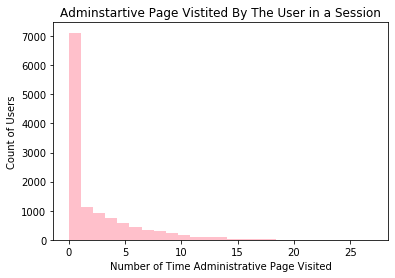

In [55]:
#Generating histograms for quantitative variables 
#Administrative 
hist_plot_Administartive = OSHIdf['Administrative'].hist(bins = 25, grid = False, color = "pink")
hist_plot_Administartive.set_title('Adminstartive Page Vistited By The User in a Session')
hist_plot_Administartive.set_xlabel('Number of Time Administrative Page Visited')
hist_plot_Administartive.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

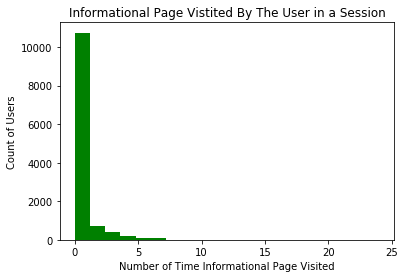

In [56]:
#Generating histograms for quantitative variables 
#Informational
hist_plot_Informational = OSHIdf['Informational'].hist(bins = 20, grid = False, color = "green")
hist_plot_Informational.set_title('Informational Page Vistited By The User in a Session')
hist_plot_Informational.set_xlabel('Number of Time Informational Page Visited')
hist_plot_Informational.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

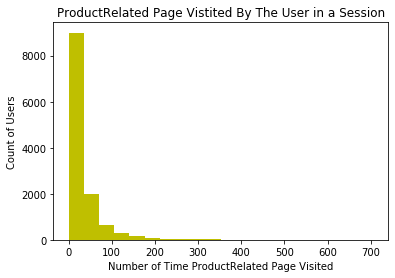

In [57]:
#Generating histograms for quantitative variables 
#ProductRelated
hist_plot_ProductRelated = OSHIdf['ProductRelated'].hist(bins = 20, grid = False, color = "y")
hist_plot_ProductRelated.set_title('ProductRelated Page Vistited By The User in a Session')
hist_plot_ProductRelated.set_xlabel('Number of Time ProductRelated Page Visited')
hist_plot_ProductRelated.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

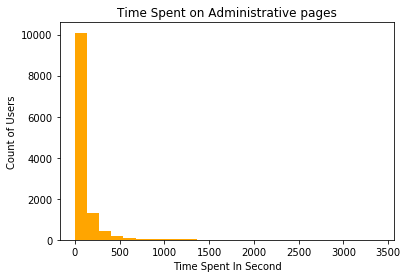

In [58]:
#Generating histograms for quantitative variables 
#Administrative_Duration
hist_plot_Administrative_Duration = OSHIdf['Administrative_Duration'].hist(bins = 25, grid = False, color = "orange")
hist_plot_Administrative_Duration.set_title('Time Spent on Administrative pages')
hist_plot_Administrative_Duration.set_xlabel('Time Spent In Second')
hist_plot_Administrative_Duration.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

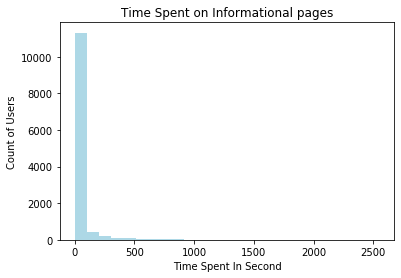

In [59]:
#Generating histograms for quantitative variables 
#Informational_Duration'
hist_plot_Informational_Duration = OSHIdf['Informational_Duration'].hist(bins = 25, grid = False, color = "lightblue")
hist_plot_Informational_Duration.set_title('Time Spent on Informational pages')
hist_plot_Informational_Duration.set_xlabel('Time Spent In Second')
hist_plot_Informational_Duration.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

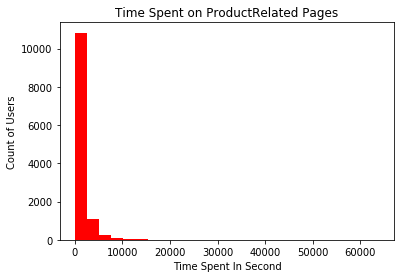

In [60]:
#Generating histograms for quantitative variables 
#ProductRelated_Duration
hist_plot_ProductRelated_Duration = OSHIdf['ProductRelated_Duration'].hist(bins = 25, grid = False, color = "r")
hist_plot_ProductRelated_Duration.set_title('Time Spent on ProductRelated Pages')
hist_plot_ProductRelated_Duration.set_xlabel('Time Spent In Second')
hist_plot_ProductRelated_Duration.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

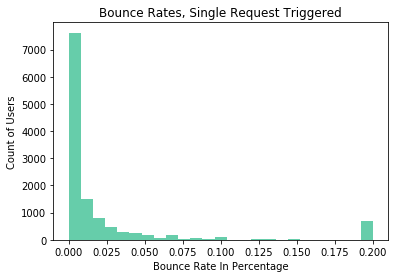

In [61]:
#Generating histograms for quantitative variables 
#BounceRates
hist_plot_BounceRates = OSHIdf['BounceRates'].hist(bins = 25, grid = False, color = "mediumaquamarine")
hist_plot_BounceRates.set_title('Bounce Rates, Single Request Triggered')
hist_plot_BounceRates.set_xlabel('Bounce Rate In Percentage')
hist_plot_BounceRates.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

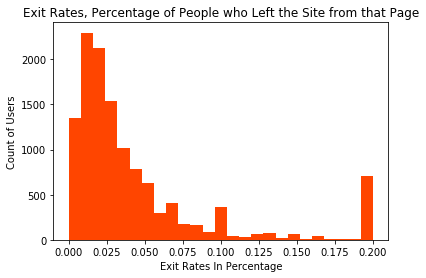

In [62]:
#Generating histograms for quantitative variables 
#Exit Rates
hist_plot_ExitRates = OSHIdf['ExitRates'].hist(bins = 25, grid = False, color = "orangered")
hist_plot_ExitRates.set_title('Exit Rates, Percentage of People who Left the Site from that Page')
hist_plot_ExitRates.set_xlabel('Exit Rates In Percentage')
hist_plot_ExitRates.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

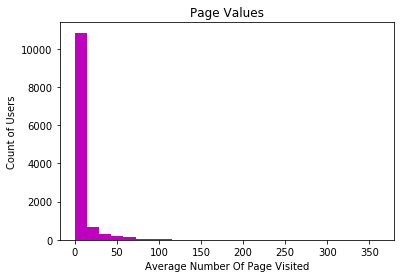

In [63]:
#Generating histograms for quantitative variables 
#Page Values
hist_plot_PageValues = OSHIdf['PageValues'].hist(bins = 25, grid = False, color = "m")
hist_plot_PageValues.set_title('Page Values')
hist_plot_PageValues.set_xlabel('Average Number Of Page Visited')
hist_plot_PageValues.set_ylabel('Count of Users')

In [64]:
#Checking the levels and frequency tables for categorical variables 
#frequency table for Month
pd.crosstab(index = OSHIdf["Month"], columns = "Count")

col_0,Count
Month,
Aug,433
Dec,1727
Feb,184
Jul,432
June,288
Mar,1907
May,3364
Nov,2998
Oct,549


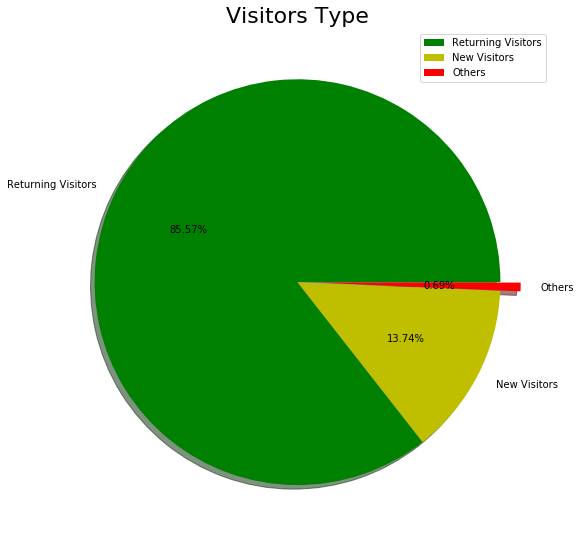

In [65]:
#Percentage of different visitors type in the dataset
plt.rcParams["figure.figsize"] = (20, 10)
size = [10551, 1694, 85]
colors = ["g", "y", "r"]
labels = "Returning Visitors", "New Visitors", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title("Visitors Type", fontsize = 22)
plt.axis("off")
plt.legend()

In [66]:
#frequency table for Weekend
pd.crosstab(index = OSHIdf["Weekend"], columns = "Count")

col_0,Count
Weekend,
False,9462
True,2868


Weekdays: 9462
weekend: 2868


<function matplotlib.pyplot.show(*args, **kw)>

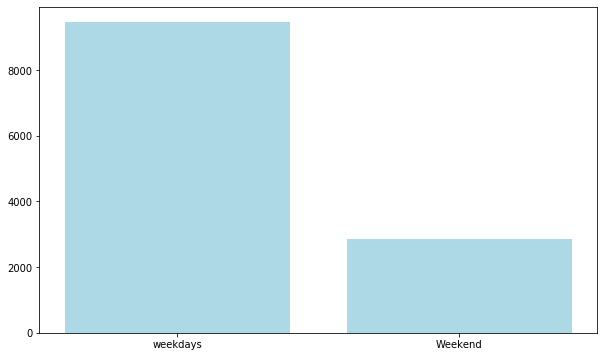

In [67]:
plt.figure(figsize =(10, 6))
print("Weekdays:", len(OSHIdf[OSHIdf.Weekend == 0]))
print("weekend:", len(OSHIdf[OSHIdf.Weekend == 1]))
y = len(OSHIdf[OSHIdf.Weekend == 0]), len(OSHIdf[OSHIdf.Weekend == 1])
x = ["weekdays", "Weekend"]
plt.bar(x, y, color = "lightblue")
plt.show

In [68]:
#frequency table for Revenue 
pd.crosstab(index = OSHIdf["Revenue"], columns = "Count")

col_0,Count
Revenue,
False,10422
True,1908


Did not buy: 10422
Bought: 1908


<function matplotlib.pyplot.show(*args, **kw)>

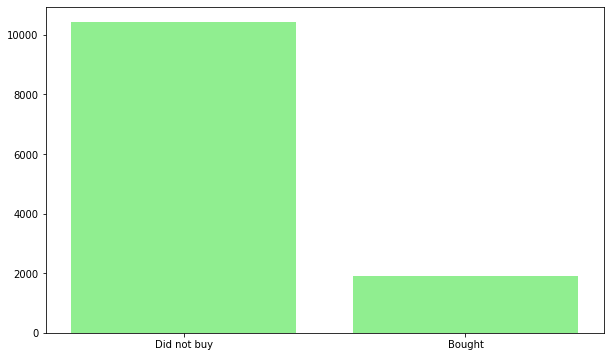

In [69]:
#Plotting the Revenue 
plt.figure(figsize =(10, 6))
print("Did not buy:", len(OSHIdf[OSHIdf.Revenue == 0]))
print("Bought:", len(OSHIdf[OSHIdf.Revenue == 1]))
y = len(OSHIdf[OSHIdf.Revenue == 0]), len(OSHIdf[OSHIdf.Revenue == 1])
x = ["Did not buy", "Bought"]
plt.bar(x, y, color = "lightgreen")
plt.show 

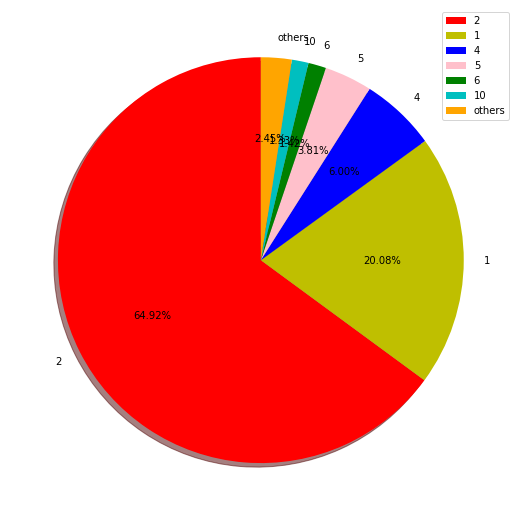

In [70]:
#percentage of different browsers
size = [7961, 2462, 736, 467, 174, 163, 300]
colors = ['r', 'y', 'b', 'pink', 'g', 'c', 'orange']
labels = "2", "1", "4", "5", "6", "10", "others"
plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.axis('off')
plt.legend()
plt.show()

In [71]:
#In python we need to distinguish between the matrix of features(Independent variables) and the dependent variable vector
OSHIX = OSHIdf.iloc[:,:-1]
OSHIX.shape

(12330, 17)

In [72]:
OSHIy = OSHIdf.iloc[:, :17:18]
OSHIy.shape

(12330, 1)

In [73]:
cleanOSHIX = OSHIX

In [74]:
#Handling non-numeric features/creating dummy or indicator variables 
cleanOSHIX = pd.get_dummies(cleanOSHIX, columns=['Month', 'VisitorType'], drop_first = True)

In [75]:
cleanOSHIX.shape

(12330, 26)

In [76]:
cleanOSHIdf["Weekend"] =cleanOSHIdf.Weekend.astype(int)

In [77]:
cleanOSHIdf["Weekend"].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [78]:
cleanOSHIdf["Revenue"] =cleanOSHIdf.Revenue.astype(int)

In [79]:
cleanOSHIdf["Revenue"].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

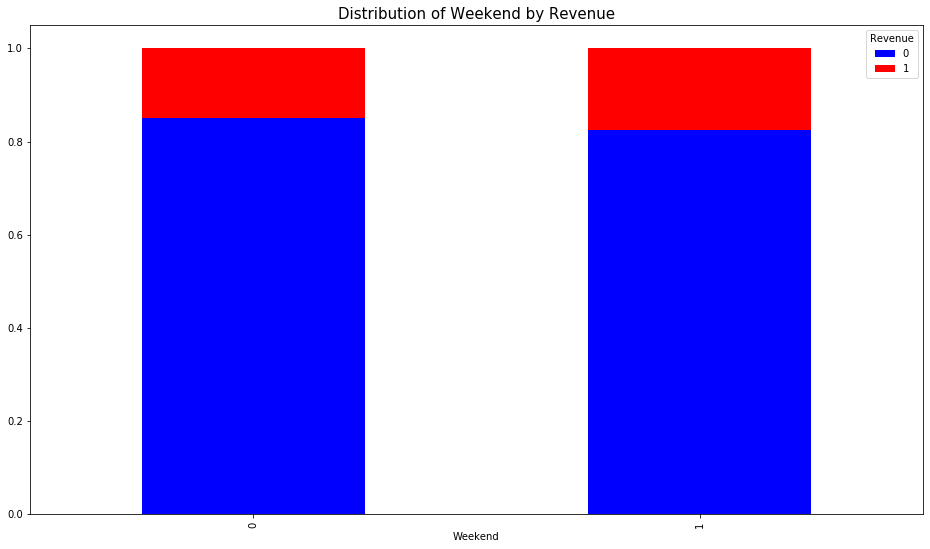

In [80]:
cleanOSHIdf = pd.crosstab(cleanOSHIdf['Weekend'], cleanOSHIdf['Revenue'])
cleanOSHIdf.div(cleanOSHIdf.sum(1).astype(float), axis =0).plot(kind = 'bar', stacked = True, figsize = (16, 9), color = ['blue', 'red'])
plt.title('Distribution of Weekend by Revenue', fontsize = 15)
plt.show()

In [81]:
OSHIdf.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [82]:
OSHIdf.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000
